In [83]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [84]:
import numpy as np
import pandas as pd

In [85]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [86]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'D', 'A'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'n', 'A'], [..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."


In [87]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [88]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [89]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[[A, D, D, A], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, n, A], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [A, D, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, A], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, n, A], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."


In [90]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [91]:
df.iloc[0]["encoded_sequence"].shape

(14, 8, 4)

In [92]:
from sklearn.model_selection import train_test_split

split = 0.3
df_train, df_test = train_test_split(df, test_size=split, random_state=0)

In [93]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((883, 14, 8, 4), (883,), (379, 14, 8, 4), (379,))

In [95]:
# Flatten encoded groove tensors for linear model
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [97]:
linear_reg = LinearRegression()
linear_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
score = linear_reg.score(X_train, y_train)
score

0.8838431630609086

In [100]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kf_cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=kfold)
kf_cv_scores.mean()

np.float64(0.8134390484157092)

In [101]:
ypred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

mae, mse

(0.24536854790169368, 0.10858613818062454)

In [102]:
df_test['y_pred'] = ypred

In [103]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,y_pred
5,AA,6,-1.470603,GTATCACGTGATAC,GTATCACGAGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.426596
364,DX,11,-0.762346,GTATCACGTGDTAC,GTAXCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.989918
52,AI,5,-1.856286,GTATAACGTGATAC,GTATCACGTIATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",I,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.654390
990,XG,1,-0.241069,XTATCACGTGATAC,GTATCACGTGATAG,"[[M, D, A, A], [M, A, D, A], [A, D, A, M], [M,...","[[x, A, D, A], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], ...",-0.193963
186,CG,10,-2.033387,GTATCACGTCATAC,GTATGACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-2.195172
...,...,...,...,...,...,...,...,...,...,...,...,...
110,AX,10,-2.342949,GTATCACGTAATAC,GTATXACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-2.069570
1027,XX,2,-0.138246,GXATCACGTGATAC,GTATCACGTGATXC,"[[A, A, D, n], [M, D, D, M], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, A, x], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.176867
500,Gg,9,-1.747387,GTATCACGGGATAC,GTATCgCGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",7dG,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.839092
1072,aG,7,-1.123645,GTATCAaGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",7dA,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.428298


In [104]:
from sklearn.metrics import r2_score

y_pred = df_test['y_pred']
r2 = r2_score(y_test, y_pred)
r2

0.8387152654839035

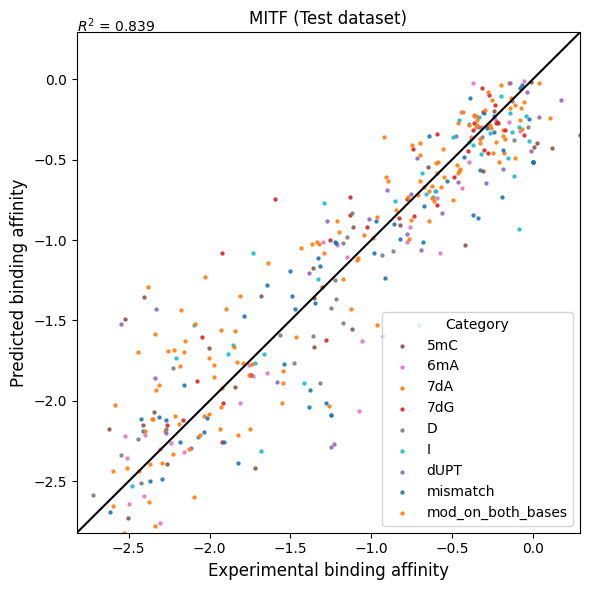

In [105]:
from matplotlib import pyplot as plt

# Ensure Category exists (uses existing categorize_change if needed)
if "Category" not in df_test.columns:
    df_test["Category"] = df_test["Change"].apply(categorize_change)

# Color map per category
colors = {
    "none": "#1f77b4",
    "I": "#17becf",
    "D": "#7f7f7f",
    "6mA": "#e377c2",
    "7dA": "#ff7f0e",
    "7dG": "#d62728",
    "dUPT": "#9467bd",
    "5mC": "#8c564b",
    "both": "#bcbd22",
}

plt.figure(figsize=(6, 6))

# Scatter per category
for cat, g in df_test.groupby("Category"):
    plt.scatter(g["ln(I)"], g["y_pred"], s=18, marker='.', alpha=0.85,
                label=cat, c=colors.get(cat, None))

plt.xlabel('Experimental binding affinity', fontsize=12)
plt.ylabel('Predicted binding affinity', fontsize=12)

p1 = max(max(ypred), max(y_test))
p2 = min(min(ypred), min(y_test))
plt.xlim([p2, p1])
plt.ylim([p2, p1])
plt.plot([p2, p1], [p2, p1], 'k-')

plt.annotate("$R^2$ = {:.3f}".format(r2), (p2, p1))
plt.legend(loc='lower right', title="Category")
plt.title(f'{TF} (Test dataset)', fontsize=12)

plt.tight_layout()
# Save pdf
plt.savefig(f'plots/{TF}_linear_regression_test.pdf')

In [107]:
# Interpret linear model coefficients on the original (L x features x encoding) grid
# and aggregate to an L x 8 grid of functional-group importances.

# Recover coefficient tensor
coef_tensor = linear_reg.coef_.reshape(seq_length, n_features, n_encoding)

# Importance as absolute coefficient magnitude
abs_coef = np.abs(coef_tensor)

# Aggregate to 8 functional groups:
assert n_features % 8 == 0
n_grooves = n_features // 8 

# Fold features => (L, n_grooves, 8, n_encoding), then sum over grooves and encoding
importance_Lx8 = abs_coef.reshape(seq_length, n_grooves, 8, n_encoding).sum(axis=(1, 3))  # (L, 8)


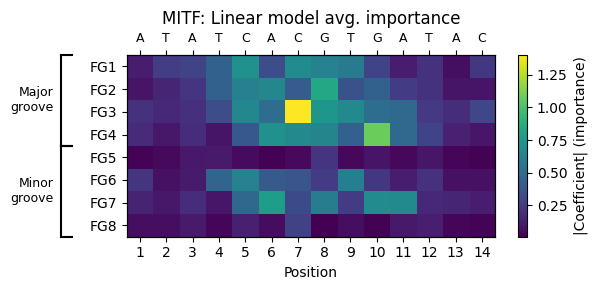

In [108]:


# Heatmap (horizontal: positions on x-axis, functional groups on y-axis)
fig, ax = plt.subplots(figsize=(6, 3))
im = ax.imshow(importance_Lx8.T, aspect='auto', cmap='viridis', origin='lower')

fig.colorbar(im, ax=ax, label='|Coefficient| (importance)')
ax.set_xlabel('Position')
ax.set_ylabel('')  # no y-axis label
ax.set_xticks(np.arange(seq_length))
ax.set_xticklabels([str(i + 1) for i in range(seq_length)])
ax.set_yticks(np.arange(8))
ax.set_yticklabels([f"FG{i + 1}" for i in range(8)])
ax.set_title(f"{TF}: Linear model avg. importance")

# Invert y-axis
ax.invert_yaxis()

# Brackets before FG labels (outside the axis, in the margin)
# Use y-axis transform: x in axes-fraction (0 at axis spine), y in data coords.
# Negative x puts graphics left of the spine (before tick labels).
x_bracket = -0.18
x_tick = -0.15

def draw_bracket(y0, y1, label):
    tr = ax.get_yaxis_transform()
    ax.plot([x_bracket, x_bracket], [y0, y1], color='k', linewidth=1.5, clip_on=False, transform=tr)
    ax.plot([x_bracket, x_tick], [y0, y0], color='k', linewidth=1.5, clip_on=False, transform=tr)
    ax.plot([x_bracket, x_tick], [y1, y1], color='k', linewidth=1.5, clip_on=False, transform=tr)
    ax.text(x_bracket - 0.02, (y0 + y1) / 2, label, va='center', ha='right', fontsize=9, transform=tr)

# FG indices are 0-based; brackets span [-0.5, 3.5] and [4.5, 7.5]
draw_bracket(-0.5, 3.5, f"Major\ngroove")
draw_bracket(3.5, 7.5, f"Minor\ngroove")

# Try to place reference (+) strand on the top x-axis
def _infer_ref_plus(_df, L):
    # 1) If a global variable 'ref_plus' exists and fits, use it
    if 'ref_plus' in globals():
        _rp = globals()['ref_plus']
        if isinstance(_rp, str) and len(_rp) == L:
            return _rp.upper()
    # 2) Look for likely columns that already contain the reference (+) strand
    preferred = [
        'ref_plus', 'reference_plus', 'ref_plus_strand', 'seq_plus', 'sequence_plus',
        'plus_strand', 'plus_sequence', 'ref', 'reference', 'wt', 'wt_plus',
        'sequence', 'seq'
    ]
    # First pass: exact preferred names
    for col in _df.columns:
        if col.lower() in preferred:
            s = _df[col].dropna().astype(str)
            if len(s):
                v = s.iloc[0]
                if len(v) == L:
                    return v.upper()
    # Second pass: fuzzy search for ref/plus/seq
    for col in _df.columns:
        low = col.lower()
        if any(k in low for k in ['ref', 'plus', 'seq']):
            s = _df[col].dropna().astype(str)
            if len(s):
                v = s.iloc[0]
                if len(v) == L:
                    return v.upper()
    # 3) As a fallback, try consensus from a sequence-like column
    for col in _df.columns:
        low = col.lower()
        if any(k in low for k in ['seq', 'sequence']):
            s = _df[col].dropna().astype(str)
            if len(s) and all(len(x) == L for x in s.head(min(50, len(s)))):
                consensus = []
                for i in range(L):
                    chars = s.str[i].str.upper()
                    # keep only canonical bases
                    chars = chars[chars.isin(list('ACGT'))]
                    consensus.append(chars.value_counts().idxmax() if len(chars) else 'N')
                return ''.join(consensus)
    return None

_ref_plus = _infer_ref_plus(df, seq_length)
if _ref_plus:
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(np.arange(seq_length))
    ax_top.set_xticklabels(list(_ref_plus), fontsize=9)
    ax_top.xaxis.set_ticks_position('top')
    ax_top.xaxis.set_label_position('top')

    # Leave extra room for the top labels and left brackets
    fig.subplots_adjust(left=0.30, top=0.85)
else:
    # Extra left margin for brackets/labels
    fig.subplots_adjust(left=0.30)

plt.tight_layout()
plt.savefig(f"plots/{TF}_linear_importance_grid.pdf", dpi=300)

